In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np
import copy

In [2]:
DATASET_TYPES = ["AAVE_UK", "RAVDESS", "Accents", "Nigeria_UK_Midlands"]
DATASET_TYPE_VAL = 1

SAVE_ONLY_TOTAL = False
COMPREHENSIBILITY_THRESHOLD_IN_TITLE = False

DATASET_TYPE = DATASET_TYPES[DATASET_TYPE_VAL]

ASR_TYPES = ["MS_IBM", "GCP_IBM", "MS_GCP"]

TRANSFORMATION_TYPES = ["Amp", "Clipping", "Drop", "Frame", "HP", "LP", "Noise", "Scale"]

GROUPS = ['Male', 'Female']

GET_UNIQUE_ERRORS = False

# SAVE_FOLDER = "/Users/sakshiudeshi/Documents/SUTD/Research/LaTeX/speechPaper/figs/"
# SAVE_FOLDER = "/Users/sakshiudeshi/Documents/SUTD/Research/LaTeX/speechPaper/figs/RQ2/"

COMPREHENSIBILITY_THRESHOLD = 6
SAVE_FOLDER = "Saved_Imgs/"

In [3]:
USER_STUDY_AVERAGES = {
    "Amp": [8.020304569, 7.634517766, 7.492385787, 7.558375635, 7.497461929, 7.182741117],
    "Clipping": [7.421319797, 7.162436548, 7.335025381, 6.92893401, 6.974619289],
    "Drop": [7.903553299, 7.431472081, 7.456852792, 7.223350254, 7.07106599],
    "Frame": [7.45177665, 7.416243655, 7.507614213, 7.507614213, 7.375634518], 
    "HP": [7.756345178, 7.553299492, 7.401015228, 7.324873096, 7.411167513], 
    "LP": [7.340101523, 7.182741117, 7.065989848, 7.131979695, 7.025380711], 
    "Noise": [7.223350254, 7.045685279, 7.025380711, 6.989847716, 6.837563452], 
    "Scale": [7.781725888, 7.335025381, 7.203045685]
}

In [4]:
def get_plot_title(DATASET_TYPE):
    if (DATASET_TYPE == "AAVE_UK"):
        return "AAVE/UK Midlands English"
    elif (DATASET_TYPE == "Nigeria_UK_Midlands"):
        return "Nigerian English/UK Midlands English"
    else: return DATASET_TYPE

In [5]:
def get_groups(dataset_type = DATASET_TYPE):
    if dataset_type == DATASET_TYPES[0]:
        return ['AAVE', 'UK Midlands English']
    
    elif dataset_type == DATASET_TYPES[1]:
        return ['Male', 'Female']
    
    if dataset_type == DATASET_TYPES[3]:
        return ['UK Midlands English', 'Nigerian English']
    
    else:
        return ['English', 'Ganda', 'French', 'Gujarati', 'Indonesian' ,'Korean', 'Russian']
    
GROUPS = get_groups()
print(GROUPS)

['Male', 'Female']


In [6]:
def get_filename_filler(dataset_type = DATASET_TYPE):
    if dataset_type == "Accents":
        return " Differential Speech Results - "
    elif dataset_type == "Nigeria_UK_Midlands":
        return " Nigeria_UK Midlands - "
    else: 
        return " - " 

In [7]:
def get_file_data(asr_type, transformation_type):
    file_name = DATASET_TYPE + "/" + asr_type + "/" + asr_type + \
    get_filename_filler() + transformation_type + ".csv"
    with open(file_name, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        file_arr = list(reader)
    return file_arr, transformation_type, asr_type

In [8]:
# def get_diff_rows_range(transformation_type = TRANSFORMATION_TYPES[0]):
#     if (transformation_type == "Amp"):
#         return list(range(12, 18))
# #     elif (transformation_type in ["Scale", "Noise", "Clipping"]): 
#     elif (transformation_type == "Scale"):
#         return list(range(11, 14))
# #     elif( or transformation_type == )
#     else:
#         return list(range(11, 16))

In [9]:
def get_diff_rows_range(transformation_type = TRANSFORMATION_TYPES[0], 
                        threshold = COMPREHENSIBILITY_THRESHOLD):
    rows_range = []
    if (transformation_type == "Amp"):
        base = 12
    else:
        base = 11
    for i, val in enumerate(USER_STUDY_AVERAGES[transformation_type]):
        if val > threshold:
            rows_range.append(i + base)
    return rows_range

# get_diff_rows_range("HP", threshold = 7.4)

In [10]:
def process_num_arr(num_arr):
    tag = str(num_arr[0])
    num_arr = num_arr[1:len(num_arr)]
    return [float(i) for i in num_arr], tag

In [11]:
def get_relevant_rows(file_data, transformation_type = TRANSFORMATION_TYPES[0]):
    diff_rows = get_diff_rows_range(transformation_type)
    row_arr, tag_arr = [], []
    for i in diff_rows:
        row, tag = process_num_arr(file_data[i - 1])
        row_arr.append(row)
        tag_arr.append(tag)
    return row_arr, tag_arr

In [12]:
# def get_original_wer(asr_type, transformation_type = TRANSFORMATION_TYPES[0]):
#     file_data, _, _ = get_file_data(asr_type, transformation_type)
#     diff_rows = get_orig_wer_rows_range(transformation_type)
#     row_arr, tag_arr = [], []
# #     print(file_data)
#     for i in diff_rows:
#         row, tag = process_num_arr(file_data[i - 1])
#         row_arr.append(row)
#         tag_arr.append(tag)
#     return row_arr, tag_arr

In [13]:
def get_formatted_diff_data(asr_type, transformation_type):
    file, _ , _  = get_file_data(asr_type = asr_type, transformation_type = transformation_type)
#     row_arr, tag_arr = get_relevant_rows(file_data = file, transformation_type = trans_type)
    row_arr, tag_arr = get_relevant_rows(file_data = file, transformation_type = transformation_type)
#     for i, row in enumerate(row_arr):
#         print(tag_arr[i], row)
#     print()
    return row_arr, tag_arr

In [14]:
def get_top_threshold(threshold):
#     [0.01, 0.05, 0.1, 0.15]
    if (threshold == 0.01):
        return 0.05
    elif (threshold == 0.05):
        return 0.1
    elif (threshold == 0.1):
        return 0.15
    elif (threshold == 0.15):
        return 1
    else:
        return 1

In [15]:
def get_error_data(asr_type, transformation_type, threshold = 0.1, languages = GROUPS, 
                   get_unique_errors = GET_UNIQUE_ERRORS):
    row_arr, tag_arr = get_formatted_diff_data(asr_type, transformation_type)
    
    row_error_arr = []
    
    if (not get_unique_errors):
        top_threshold = 1.1
    else:
        top_threshold = get_top_threshold(threshold)
    
    for row in row_arr:
        error_arr = []
        for base_gr in range(len(row)):
            errors = 0
            for comp_gr in range(len(row)):
#                 print(base_gr , comp_gr)
                if(row[base_gr] - row[comp_gr] > threshold and 
                   row[base_gr] - row[comp_gr] < top_threshold):
                     errors += 1
            error_arr.append(errors)
        row_error_arr.append(error_arr)
            
    return row_error_arr, tag_arr
            
            
        

In [16]:
def get_error_sums(row_error_arr):
    error_sum_arr = []
    if len(row_error_arr) < 1:
        return [0] * len(GROUPS)
    for j in range(len(row_error_arr[0])):
        error_sum = 0
        for i in range(len(row_error_arr)):
            error_sum += row_error_arr[i][j]
        error_sum_arr.append(error_sum)
    return error_sum_arr

In [17]:
class error_data_nugget:
    def __init__(self, tau, asr_type, transformation_type, error_row):
        self.tau = tau
        self.asr_type = asr_type
        self.transformation_type = transformation_type
        self.error_row = error_row

In [18]:
def get_sum_error_data_nuggets():
    error_data_nuggets = []
    for tau in [0.01, 0.05, 0.1, 0.15]:
#         print(['Tau ' + str(tau)] )
        for asr_type in ASR_TYPES:
            sum_rows = []
            for trans_type in TRANSFORMATION_TYPES:
                row_error_arr, tag_arr = get_error_data(asr_type, trans_type, threshold=tau)

                sum_rows.append(get_error_sums(row_error_arr))

    #         for i, row_error in enumerate(sum_rows):
    #             print([''] + row_error)  
    #         print("-----------")
            error_sum_row = get_error_sums(sum_rows)
            error_data_nuggets.append(error_data_nugget(tau, asr_type, 'ALL', error_sum_row)) 
            
    return error_data_nuggets

In [19]:
def get_data_nugget_sums(error_data_nuggets):
    row_error_arr = []
#     print(len(error_data_nuggets))
    for nugget in error_data_nuggets:
        row_error_arr.append(nugget.error_row)
    return get_error_sums(row_error_arr)

In [20]:
error_data_nuggets = []
for tau in [0.01, 0.05, 0.1, 0.15]:
# for tau in [0]:
#     print(['Tau ' + str(tau)] )
    for asr_type in ASR_TYPES:
        sum_rows = []
        for trans_type in TRANSFORMATION_TYPES:
            row_error_arr, tag_arr = get_error_data(asr_type, trans_type, threshold=tau)
            error_data_nuggets.append(error_data_nugget(tau, asr_type, trans_type, get_error_sums(row_error_arr)))  

            sum_rows.append(get_error_sums(row_error_arr))
            
#         for i, row_error in enumerate(sum_rows):
#             print(row_error)  
#         print("-----------")
#         error_sum_row = get_error_sums(sum_rows)
#         print(error_sum_row)
#         print("____________")
#     print()
        
# error_data_nuggets = get_sum_error_data_nuggets()

In [21]:
def get_tau_data_subset(error_data_nuggets, tau = 0.01):
    error_data_nuggets_subsets = []
    for data in error_data_nuggets:
        if data.tau == tau:
            error_data_nuggets_subsets.append(data)
    return error_data_nuggets_subsets

In [22]:
def get_asr_type_data_subset(error_data_nuggets, asr_type = "MS_IBM"):
    error_data_nuggets_subsets = []
    for data in error_data_nuggets:
        if data.asr_type == asr_type:
            error_data_nuggets_subsets.append(data)
    return error_data_nuggets_subsets

In [23]:
def get_asr_gr_type_subset(error_data_nuggets, gr_val = 0):
    error_data_nuggets_subsets = []
    for data in error_data_nuggets:
        error_data_nuggets_subsets.append(error_data_nugget(data.tau, data.asr_type, 'ALL', [data.error_sum_row[gr_val]]))
    return error_data_nuggets_subsets

In [24]:
def get_asr_tr_type_subset(error_data_nuggets, tr_type = "Noise"):
    error_data_nuggets_subsets = []
    
    for data in error_data_nuggets:
        if data.transformation_type == tr_type:
            error_data_nuggets_subsets.append(data)    
    return error_data_nuggets_subsets

In [25]:
def autolabel(rects, dataset_type = DATASET_TYPE, custom_height = False, custom_height_multiplier = 0.03, custom_max = 1):
    
    
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if dataset_type == DATASET_TYPES[0]:
            text_height = height + max(0.02*height, 0.5)
    
        elif dataset_type == DATASET_TYPES[1]:
            text_height = height + max(0.02*height, 0.5)

        elif dataset_type == DATASET_TYPES[3]:
            text_height = height + max(0.02*height, 0.5)  
            
        else:
            text_height = height + max(0.03*height, 3)
            
        if(custom_height):
            text_height = height + max(custom_height_multiplier*height, custom_max)
            
        ax.text(rect.get_x() + rect.get_width()/2., text_height,
                '%d' % int(height),
                ha='center', va='bottom', rotation="vertical")

In [26]:
def get_percentages(sum_arrs, base_gr = 0):
    p_sum_arrs = []
    for sum_arr in sum_arrs:
        p_sum_arr = []
        for i, val in enumerate(sum_arr):
            if i != base_gr:
                try:
                    p_sum_arr.append(( val - sum_arr[base_gr]) * 100/sum_arr[base_gr])
                except ZeroDivisionError:
                    p_sum_arr.append(np.inf)
        p_sum_arrs.append(p_sum_arr)
        
    return p_sum_arrs

528.5714285714286
[528.5714285714286]
528.5714285714286
[528.5714285714286]


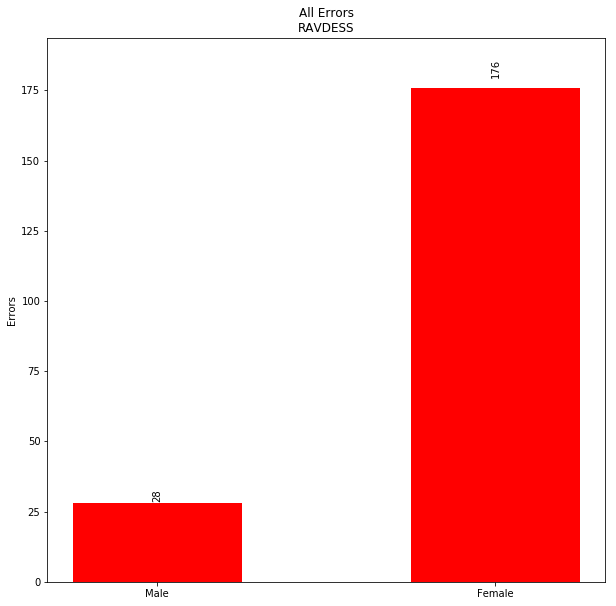

In [27]:
# All Errors plots
width = 0.5
# spacing = 0.2
colors = ['r', 'g', 'b', 'y']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
# print(ind + width*i)

rects = []

sum_arrs = []
error_data_nuggets_subset = copy.deepcopy(error_data_nuggets)
sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
sum_arrs.append(sum_arr)

# print(sum_arrs)

print(np.mean (get_percentages(sum_arrs)))
print([np.mean(p_sum_arr) for p_sum_arr in get_percentages(sum_arrs)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)

    
rects.append(ax.bar(ind + width, sum_arr, width = width, color=colors[0]))
#     plt.bar(LANGUAGES, sum_arr)


for rect in rects:
    autolabel(rect)
    
plt.ylim(top = np.max(sum_arrs) * 1.1)



# ax.legend((rect for rect in rects), (tau_val for tau_val in tau_vals))
ax.set_xticks(ind + width *1)
ax.set_xticklabels(GROUPS)
ax.set_ylabel('Errors')

if not COMPREHENSIBILITY_THRESHOLD_IN_TITLE:
    plt.title ("All Errors\n" + get_plot_title(DATASET_TYPE))
else:
    plt.title ("All Errors\nComprehensibility Threshold: " + str(COMPREHENSIBILITY_THRESHOLD) + "\n" + get_plot_title(DATASET_TYPE))


plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Total-Errors-Comprehensibility-Thresh-" + str(COMPREHENSIBILITY_THRESHOLD) + ".png", bbox='tight', dpi=300)
plt.show()


445.62499999999994
[666.6666666666666, 562.5, 320.0, 233.33333333333334]
666.6666666666666
[666.6666666666666]
[562.5]
[320.0]
[233.33333333333334]


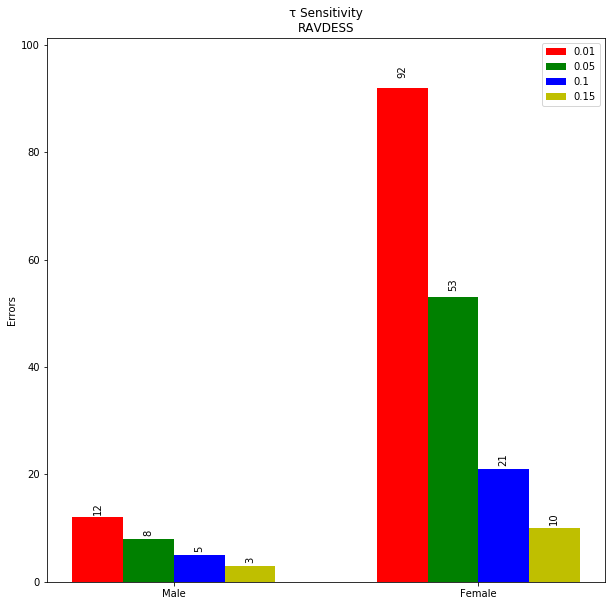

In [28]:
## Tau vary plots
width = 0.25
# spacing = 0.2
colors = ['r', 'g', 'b', 'y']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5
num_offset = 0.2


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
# print(ind + width*i)

rects = []

sum_arrs = []
for i, tau_val in enumerate(tau_vals):
#     print(i)
    error_data_nuggets_subset = get_tau_data_subset(error_data_nuggets, tau = tau_val)
    sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     ax.text(ind + width*i, sum_arr + num_offset , "5")
#     plt.bar(GROUPS, sum_arr)

print(np.mean (get_percentages(sum_arrs)))
print([np.mean(p_sum_arr) for p_sum_arr in get_percentages(sum_arrs)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)

plt.ylim(top = np.max(sum_arrs) *1.1)


for rect in rects:
    autolabel(rect)


ax.legend((rect for rect in rects), (tau_val for tau_val in tau_vals))
ax.set_xticks(ind + width * 1.5)
ax.set_xticklabels( GROUPS)
ax.set_ylabel('Errors')
if not COMPREHENSIBILITY_THRESHOLD_IN_TITLE:
    plt.title ("τ Sensitivity\n" + get_plot_title(DATASET_TYPE))
else:
    plt.title ("τ Sensitivity\nComprehensibility Threshold: " + str(COMPREHENSIBILITY_THRESHOLD) + "\n" + get_plot_title(DATASET_TYPE))

if not SAVE_ONLY_TOTAL:
    plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Tau-Errors-Comprehensibility-Thresh-" + str(COMPREHENSIBILITY_THRESHOLD) + ".png",bbox='tight', dpi=300)

plt.show()


530.7407407407408
[(470.0, 'MS_IBM'), (611.1111111111111, 'GCP_IBM'), (511.1111111111111, 'MS_GCP')]
611.1111111111111
[470.0]
[611.1111111111111]
[511.1111111111111]


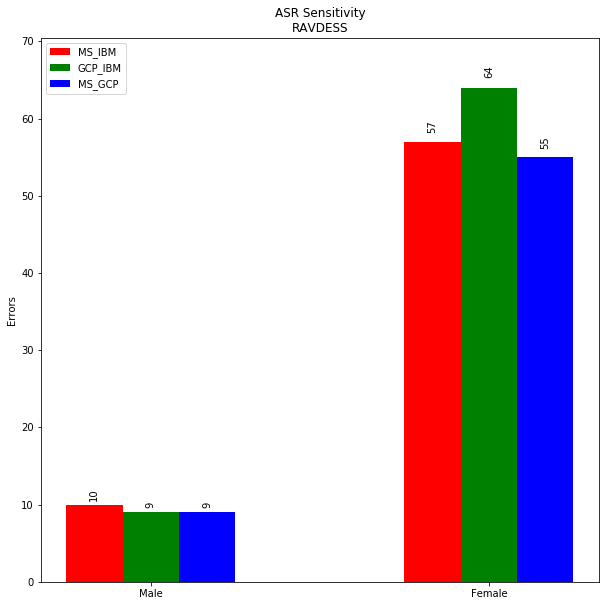

In [29]:
## ASR_TYPE vary plots
width = 0.25
# spacing = 0.2
colors = ['r', 'g', 'b', 'y']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
# print(ind + width*i)

rects = []

sum_arrs = []
for i, asr_type in enumerate(ASR_TYPES):
    error_data_nuggets_subset = get_asr_type_data_subset(error_data_nuggets, asr_type = asr_type)
    sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(GROUPS, sum_arr)


    
print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), ASR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    
plt.ylim(top = np.max(sum_arrs) *1.1)

for rect in rects:
    autolabel(rect)



ax.legend((rect for rect in rects), (asr_type for asr_type in ASR_TYPES))
ax.set_xticks(ind + width * 1)
ax.set_xticklabels( GROUPS)
ax.set_ylabel('Errors')
if not COMPREHENSIBILITY_THRESHOLD_IN_TITLE:
    plt.title ("ASR Sensitivity\n" + get_plot_title(DATASET_TYPE))
else:
    plt.title ("ASR Sensitivity\nComprehensibility Threshold: " + str(COMPREHENSIBILITY_THRESHOLD) + "\n"  + get_plot_title(DATASET_TYPE))

if not SAVE_ONLY_TOTAL:
    plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-ASR-Errors-Comprehensibility-Thresh-" + str(COMPREHENSIBILITY_THRESHOLD) + ".png",bbox='tight', dpi=300)

plt.show()


[0.5 2. ]
inf
[(inf, 'Clipping'), (inf, 'Drop'), (1200.0, 'Frame')]
inf
[inf]
[inf]
[1200.0]


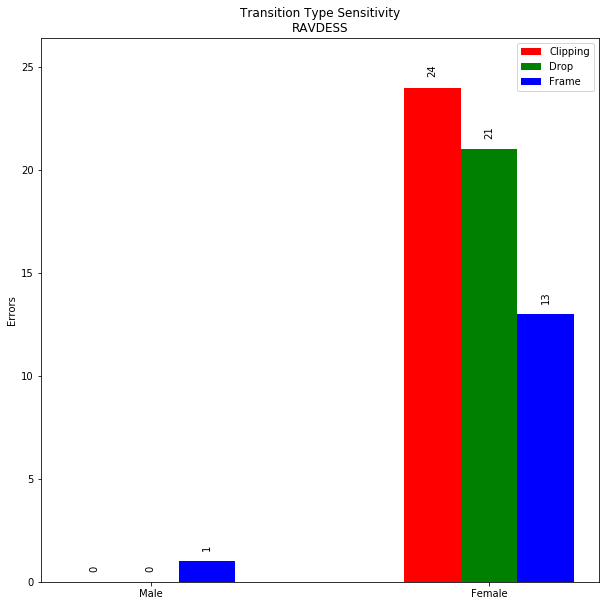

In [30]:
## Tr_Type vary plots where English does very well
width = 0.25
# spacing = 0.2
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5

TR_TYPES = ["Clipping", "Drop", "Frame"]

if(DATASET_TYPE_VAL == 3):
    TR_TYPES = ["Scale", "Drop", "Noise"]


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
print(ind + width*i)

rects = []

sum_arrs = []
for i, trans_type in enumerate(TR_TYPES):
    error_data_nuggets_subset = get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type)
    sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(LANGUAGES, sum_arr)

for rect in rects:
    autolabel(rect)
    
plt.ylim(top = np.max(sum_arrs) *1.1)

print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    



ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
ax.set_xticks(ind + width )
ax.set_xticklabels(GROUPS)
ax.set_ylabel('Errors')

if not COMPREHENSIBILITY_THRESHOLD_IN_TITLE:
    plt.title ("Transition Type Sensitivity\n" + get_plot_title(DATASET_TYPE))

else:
    plt.title ("Transition Type Sensitivity\nComprehensibility Threshold: " + str(COMPREHENSIBILITY_THRESHOLD) + "\n"  + get_plot_title(DATASET_TYPE))


if not SAVE_ONLY_TOTAL:
    plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Transition-1-Errors-Comprehensibility-Thresh-" + str(COMPREHENSIBILITY_THRESHOLD) + ".png",bbox='tight', dpi=300)

plt.show()


[0.4 1.9]
inf
[(inf, 'Noise'), (inf, 'LP'), (inf, 'Amp')]
inf
[inf]
[inf]
[inf]


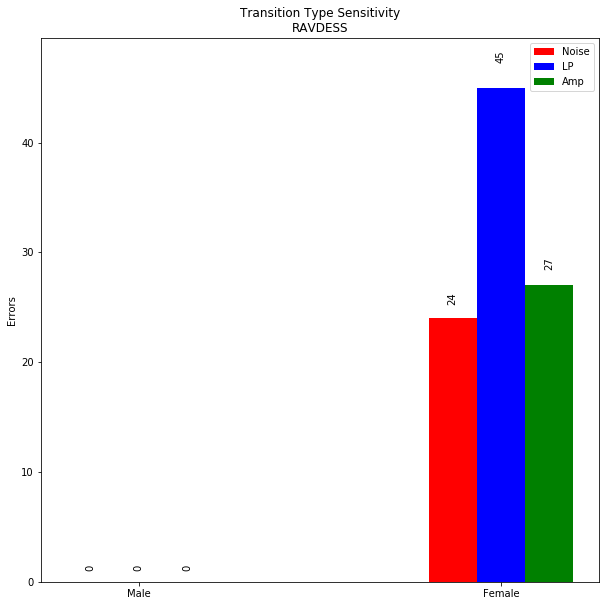

In [31]:
## Tr_Type vary plots where English does very well
width = 0.2
# spacing = 0.2
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'tab:orange']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5

TR_TYPES = ["Noise", "LP"]

if(DATASET_TYPE_VAL == 0):
    TR_TYPES = TR_TYPES + []
    multiplier = 0.5
elif(DATASET_TYPE_VAL == 1):
    TR_TYPES = TR_TYPES + ["Amp"]
    multiplier = 1
elif(DATASET_TYPE_VAL == 3):
    TR_TYPES = ["Amp", "HP", "LP"]
    multiplier = 1
else:
    multiplier = 0.5

# print(TR_TYPES)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
print(ind + width*i)

rects = []

plt.ylim(top = np.max(sum_arrs) *1.1)


sum_arrs = []
for i, trans_type in enumerate(TR_TYPES):
    error_data_nuggets_subset = get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type)
    sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(GROUPS, sum_arr)

for rect in rects:
#     autolabel(rect)
    autolabel(rect, custom_height=True, custom_height_multiplier=0.05)
    

print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    
    
plt.ylim(top = np.max(sum_arrs) *1.1)



ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
ax.set_xticks(ind + width * multiplier )
ax.set_xticklabels(GROUPS)
ax.set_ylabel('Errors')

if not COMPREHENSIBILITY_THRESHOLD_IN_TITLE:
    plt.title ("Transition Type Sensitivity\n" + get_plot_title(DATASET_TYPE))
else:
    plt.title ("Transition Type Sensitivity\nComprehensibility Threshold: " + str(COMPREHENSIBILITY_THRESHOLD) + "\n"  + get_plot_title(DATASET_TYPE))

# if not SAVE_ONLY_TOTAL:
#     continue
#     plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Transition-2-Errors-Comprehensibility-Thresh-" + str(COMPREHENSIBILITY_THRESHOLD) + ".png",bbox='tight', dpi=300)

plt.show()


[0.5 2. ]
16.66666666666667
[(122.22222222222223, 'HP'), (-88.88888888888889, 'Scale')]
122.22222222222223
[122.22222222222223]
[-88.88888888888889]


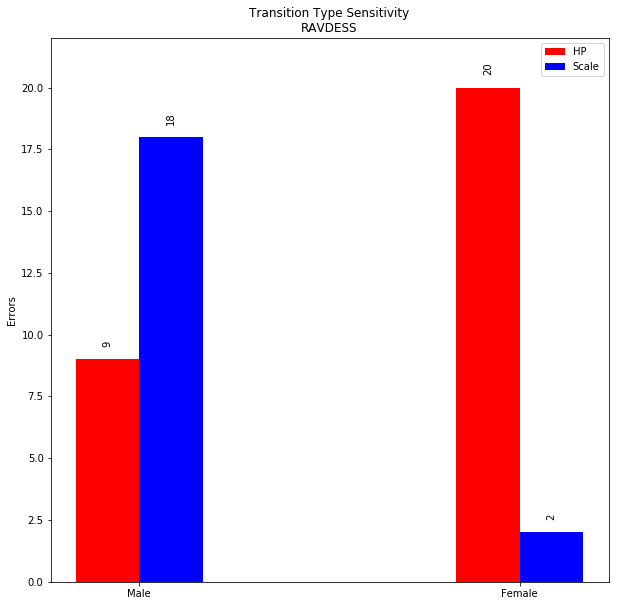

In [32]:
## Tr_Type vary plots where English does comparaby to others
width = 0.25
# spacing = 0.2
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'tab:orange']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5

TR_TYPES = ["Amp", "HP", "Scale"]


if(DATASET_TYPE_VAL == 0):
    TR_TYPES = TR_TYPES + []
    multiplier = 1
elif(DATASET_TYPE_VAL == 1):
    TR_TYPES = ["HP", "Scale"]
    multiplier = 0.5
elif(DATASET_TYPE_VAL == 3):
    TR_TYPES = ["Clipping", "Frame"]
    multiplier = 0.5
else:
    multiplier = 1


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
print(ind + width*i)

plt.ylim(top = np.max(sum_arrs) *1.1)





rects = []

sum_arrs = []
for i, trans_type in enumerate(TR_TYPES):
    error_data_nuggets_subset = get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type)
    sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(GROUPS, sum_arr)

for rect in rects:
    autolabel(rect)
    
plt.ylim(top = np.max(sum_arrs) *1.1)

print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    



ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
ax.set_xticks(ind + width * multiplier)
ax.set_xticklabels(GROUPS)
ax.set_ylabel('Errors')

if not COMPREHENSIBILITY_THRESHOLD_IN_TITLE:
    plt.title ("Transition Type Sensitivity\n" + get_plot_title(DATASET_TYPE))
else:
    plt.title ("Transition Type Sensitivity\nComprehensibility Threshold: " + str(COMPREHENSIBILITY_THRESHOLD) + "\n"  + get_plot_title(DATASET_TYPE))

if not SAVE_ONLY_TOTAL:
    plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Transition-3-Errors-Comprehensibility-Thresh-" + str(COMPREHENSIBILITY_THRESHOLD) + ".png",bbox='tight', dpi=300)

plt.show()


In [33]:

# ## ASR_TYPE vary plots

# for i, asr_type in enumerate(ASR_TYPES):
#     width = 0.25
#     # spacing = 0.2
#     colors = ['r', 'g', 'b', 'y']
#     tau_vals = [0.01, 0.05, 0.1, 0.15]
#     step_size = 1.5


#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111)

#     N = len(GROUPS)
#     ind = np.arange(N * step_size, step = step_size) 
#     # print(ind + width*i)

#     rects = []

#     sum_arrs = []
#     #     error_data_nuggets_subset = get_asr_type_data_subset(error_data_nuggets, asr_type = asr_type)
#     for i, tau_val in enumerate(tau_vals):
#         error_data_nuggets_subset = get_asr_type_data_subset(get_tau_data_subset(error_data_nuggets, tau = tau_val), asr_type = asr_type)
#         sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
#         sum_arrs.append(sum_arr)
#         rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))

#     for rect in rects:
#         autolabel(rect)

#     plt.ylim(top = np.max(sum_arrs) *1.1)



#     ax.legend((rect for rect in rects), (tau_vals for tau_vals in tau_vals))
#     ax.set_xticks(ind + width * 1)
#     ax.set_xticklabels( GROUPS)
#     ax.set_ylabel('Errors')
#     plt.title ("Tau Sensitivity for ASR: "+ asr_type +"\n" + get_plot_title(DATASET_TYPE))
#     # plt.savefig(SAVE_FOLDER + DATASET_TYPE + " - ASR Errors",bbox='tight', dpi=300)

#     plt.show()


In [34]:

# ## ASR_TYPE vary plots

# for i, asr_type in enumerate(ASR_TYPES):
#     print(asr_type)
#     ## Tr_Type vary plots where English does very well
#     width = 0.25
#     # spacing = 0.2
#     colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange']
#     tau_vals = [0.01, 0.05, 0.1, 0.15]
#     step_size = 1.5

#     TR_TYPES = ["Clipping", "Drop", "Frame"]


#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111)

#     N = len(GROUPS)
#     ind = np.arange(N * step_size, step = step_size) 
#     print(ind + width*i)

#     rects = []

#     sum_arrs = []
#     for i, trans_type in enumerate(TR_TYPES):
#         error_data_nuggets_subset = get_asr_type_data_subset(get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type), asr_type = asr_type)
#         sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
#         sum_arrs.append(sum_arr)

#     # print(sum_arrs)

#         rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     #     plt.bar(LANGUAGES, sum_arr)

#     for rect in rects:
#         autolabel(rect)

#     plt.ylim(top = np.max(sum_arrs) *1.1)

#     print(np.mean (get_percentages(sum_arrs)))
#     print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
#     print(np.max(get_percentages(sum_arrs)))
#     for p_sum_arr in get_percentages(sum_arrs):
#         print(p_sum_arr)




#     ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
#     ax.set_xticks(ind + width )
#     ax.set_xticklabels(GROUPS)
#     ax.set_ylabel('Errors')
#     plt.title ("Transition Type Sensitivity\n" + asr_type + "\n" + get_plot_title(DATASET_TYPE))
# #     plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Transition-1-Errors",bbox='tight', dpi=300)

#     plt.show()


In [35]:

# ## ASR_TYPE vary plots

# for i, asr_type in enumerate(ASR_TYPES):
#     print(asr_type)
#     ## Tr_Type vary plots where English does very well
#     width = 0.25
#     # spacing = 0.2
#     colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange']
#     tau_vals = [0.01, 0.05, 0.1, 0.15]
#     step_size = 1.5

#     TR_TYPES = ["LP", "HP", "Noise"]


#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111)

#     N = len(GROUPS)
#     ind = np.arange(N * step_size, step = step_size) 
#     print(ind + width*i)

#     rects = []

#     sum_arrs = []
#     for i, trans_type in enumerate(TR_TYPES):
#         error_data_nuggets_subset = get_asr_type_data_subset(get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type), asr_type = asr_type)
#         sum_arr = (get_data_nugget_sums(error_data_nuggets_subset))
#         sum_arrs.append(sum_arr)

#     # print(sum_arrs)

#         rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     #     plt.bar(LANGUAGES, sum_arr)

#     for rect in rects:
#         autolabel(rect)

#     plt.ylim(top = np.max(sum_arrs) *1.1)

#     print(np.mean (get_percentages(sum_arrs)))
#     print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
#     print(np.max(get_percentages(sum_arrs)))
#     for p_sum_arr in get_percentages(sum_arrs):
#         print(p_sum_arr)




#     ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
#     ax.set_xticks(ind + width )
#     ax.set_xticklabels(GROUPS)
#     ax.set_ylabel('Errors')
#     plt.title ("Transition Type Sensitivity\n" + asr_type + "\n" + get_plot_title(DATASET_TYPE))
# #     plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Transition-1-Errors",bbox='tight', dpi=300)

#     plt.show()


## 